In [54]:
!pip install torch torchvision matplotlib pillow



In [55]:
import torch
import torch.nn as nn

class MedGemmaModel(nn.Module):
    def __init__(self):
        super(MedGemmaModel, self).__init__()
        # ตัวอย่าง layer ง่าย ๆ
        self.conv = nn.Conv2d(1, 16, 3, 1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(16*222*222, 2)  # สมมติเป็น binary classification

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.flatten(x)
        x = self.fc(x)
        return torch.softmax(x, dim=1)

# สร้างโมเดลและตั้งเป็น eval mode
model = MedGemmaModel()
model.eval()


MedGemmaModel(
  (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=788544, out_features=2, bias=True)
)

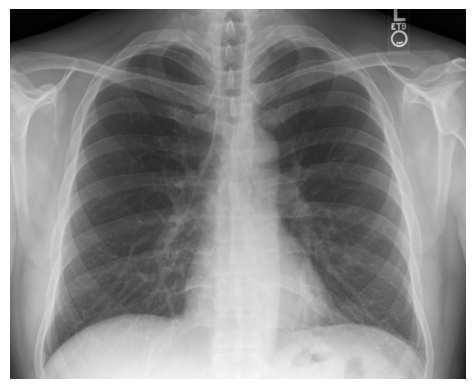

In [56]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# URL ตัวอย่าง X-ray
img_url = "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"

# ส่ง header User-Agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/116.0.0.0 Safari/537.36"
}

response = requests.get(img_url, headers=headers)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert('L')  # แปลงเป็น grayscale
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
else:
    print("โหลดภาพไม่สำเร็จ, status code:", response.status_code)


In [57]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0)

with torch.no_grad():
    output = model(img_tensor)
    print("ผลลัพธ์ Inference:", output)
    pred_class = torch.argmax(output, dim=1).item()
    print("คลาสที่โมเดลทำนาย:", pred_class)


ผลลัพธ์ Inference: tensor([[0.5106, 0.4894]])
คลาสที่โมเดลทำนาย: 0


In [58]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0)  # เพิ่ม batch dimension


In [59]:
with torch.no_grad():
    output = model(img_tensor)
    print("ผลลัพธ์ Inference:", output)
    pred_class = torch.argmax(output, dim=1).item()
    print("คลาสที่โมเดลทำนาย:", pred_class)


ผลลัพธ์ Inference: tensor([[0.5106, 0.4894]])
คลาสที่โมเดลทำนาย: 0
